In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV,train_test_split,KFold
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss,roc_auc_score
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
Dataset = pd.read_csv("Dataset_female.csv")

In [3]:
display(Dataset)

,ID,Name,Last_Name,Sex,Age,Menopause_age,Tscore_Hip_total,CRP,Cr,ALP,...,Tscore_Hip_neck,Zscore_Hip_neck,BMI,Pregnancy_Count,Histroy_Anticoagulant,Active_Smoking,History_Smoking,Calcium_Supplement,History_Diabetes_2,Refracture
0,1163,گلدسته,اسلامی,0,66,50,-1.6,5,1.1,320,...,-2.3,-0.8,26.7,13,0,0,,0,0,0
1,1035,زرین,غلامی عبدی,0,65,50,-2.6,6,0.7,170,...,-3.5,-2,28.3,12,1,0,0,0,0,0
2,916,فاطمه,قاسمی,0,72,40,-1.7,29,0.7,190,...,-3,-1.1,24.4,12,0,0,0,0,0,0
3,1358,حلیمه,رضایی,0,62,40,-0.2,1,0.9,175,...,-1.5,0.7,22.6,12,,,0,0,,0
4,146,زهرا,فلاح مراد,0,76,50,-1.6,13,1.2,290,...,-1.8,0.3,33.2,10,,,0,0,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1103,زهرا,امیری,0,77,,-2.2,11,1,134,...,-2.9,-0.8,,,0,,,,,1
708,1107,صدیقه,اسمعیلی,0,65,,-1,33,0.8,123,...,-2,-0.5,,,0,,,,,1
709,1115,سیده ربابه,اکبری,0,62,,-0.1,19,0.9,201,...,-2,-0.7,,,0,,,,,0
710,1109,لیلا,کیا شمشکی,0,56,,0.1,32,1,153,...,-1.2,-0.2,,,0,,,,,0


In [4]:
Dataset.drop("Name", axis = 1, inplace=True)
Dataset.drop("Last_Name", axis = 1, inplace=True)
Dataset.replace(r'\s+', np.nan, regex=True, inplace=True)

In [5]:
display(Dataset)

,ID,Sex,Age,Menopause_age,Tscore_Hip_total,CRP,Cr,ALP,BUN,P,...,Tscore_Hip_neck,Zscore_Hip_neck,BMI,Pregnancy_Count,Histroy_Anticoagulant,Active_Smoking,History_Smoking,Calcium_Supplement,History_Diabetes_2,Refracture
0,1163,0,66,50,-1.6,5,1.1,320,25,4.5,...,-2.3,-0.8,26.7,13,0,0,NaN,0,0,0
1,1035,0,65,50,-2.6,6,0.7,170,17,4.2,...,-3.5,-2,28.3,12,1,0,0,0,0,0
2,916,0,72,40,-1.7,29,0.7,190,19,4.3,...,-3,-1.1,24.4,12,0,0,0,0,0,0
3,1358,0,62,40,-0.2,1,0.9,175,16,3.2,...,-1.5,0.7,22.6,12,NaN,NaN,0,0,NaN,0
4,146,0,76,50,-1.6,13,1.2,290,23,3.3,...,-1.8,0.3,33.2,10,NaN,NaN,0,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1103,0,77,NaN,-2.2,11,1,134,11,3.7,...,-2.9,-0.8,NaN,NaN,0,NaN,NaN,NaN,NaN,1
708,1107,0,65,NaN,-1,33,0.8,123,12,2.3,...,-2,-0.5,NaN,NaN,0,NaN,NaN,NaN,NaN,1
709,1115,0,62,NaN,-0.1,19,0.9,201,12,4.7,...,-2,-0.7,NaN,NaN,0,NaN,NaN,NaN,NaN,0
710,1109,0,56,NaN,0.1,32,1,153,16,4,...,-1.2,-0.2,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [6]:
Dataset.isnull().sum()

ID                         0
Sex                        0
Age                        0
Menopause_age             44
Tscore_Hip_total          59
CRP                       25
Cr                        25
ALP                       34
BUN                       36
P                         37
Ca                        31
PTH                      122
Vit_D3                    53
BMD_vertebra              75
Tscore_vertebra           73
Zscore_vertebra           73
BMD_Hip_total             57
Zscore_hip_total          58
BMD_Hip_Neck              60
Tscore_Hip_neck           60
Zscore_Hip_neck           60
BMI                       11
Pregnancy_Count           97
Histroy_Anticoagulant    125
Active_Smoking           155
History_Smoking           37
Calcium_Supplement        39
History_Diabetes_2       115
Refracture                 0
dtype: int64

In [7]:
print('Percent of missing "Menopause_age" records is %.2f%%' %((Dataset['Menopause_age'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Tscore_Hip_total" records is %.2f%%' %((Dataset['Tscore_Hip_total'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "CRP" records is %.2f%%' %((Dataset['CRP'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Cr" records is %.2f%%' %((Dataset['Cr'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "ALP" records is %.2f%%' %((Dataset['ALP'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "BUN" records is %.2f%%' %((Dataset['BUN'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "P" records is %.2f%%' %((Dataset['P'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Ca" records is %.2f%%' %((Dataset['Ca'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "PTH" records is %.2f%%' %((Dataset['PTH'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Vit_D3" records is %.2f%%' %((Dataset['Vit_D3'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "BMD_vertebra" records is %.2f%%' %((Dataset['BMD_vertebra'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Tscore_vertebra" records is %.2f%%' %((Dataset['Tscore_vertebra'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Zscore_vertebra" records is %.2f%%' %((Dataset['Zscore_vertebra'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "BMD_Hip_total" records is %.2f%%' %((Dataset['BMD_Hip_total'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Zscore_hip_total" records is %.2f%%' %((Dataset['Zscore_hip_total'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "BMD_Hip_Neck" records is %.2f%%' %((Dataset['BMD_Hip_Neck'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Tscore_Hip_neck" records is %.2f%%' %((Dataset['Tscore_Hip_neck'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Zscore_Hip_neck" records is %.2f%%' %((Dataset['Zscore_Hip_neck'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "BMI" records is %.2f%%' %((Dataset['BMI'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Pregnancy_Count" records is %.2f%%' %((Dataset['Pregnancy_Count'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Histroy_Anticoagulant" records is %.2f%%' %((Dataset['Histroy_Anticoagulant'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Active_Smoking" records is %.2f%%' %((Dataset['Active_Smoking'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "History_Smoking" records is %.2f%%' %((Dataset['History_Smoking'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Calcium_Supplement" records is %.2f%%' %((Dataset['Calcium_Supplement'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "History_Diabetes_2" records is %.2f%%' %((Dataset['History_Diabetes_2'].isnull().sum()/Dataset.shape[0])*100))


Percent of missing "Menopause_age" records is 6.18%
Percent of missing "Tscore_Hip_total" records is 8.29%
Percent of missing "CRP" records is 3.51%
Percent of missing "Cr" records is 3.51%
Percent of missing "ALP" records is 4.78%
Percent of missing "BUN" records is 5.06%
Percent of missing "P" records is 5.20%
Percent of missing "Ca" records is 4.35%
Percent of missing "PTH" records is 17.13%
Percent of missing "Vit_D3" records is 7.44%
Percent of missing "BMD_vertebra" records is 10.53%
Percent of missing "Tscore_vertebra" records is 10.25%
Percent of missing "Zscore_vertebra" records is 10.25%
Percent of missing "BMD_Hip_total" records is 8.01%
Percent of missing "Zscore_hip_total" records is 8.15%
Percent of missing "BMD_Hip_Neck" records is 8.43%
Percent of missing "Tscore_Hip_neck" records is 8.43%
Percent of missing "Zscore_Hip_neck" records is 8.43%
Percent of missing "BMI" records is 1.54%
Percent of missing "Pregnancy_Count" records is 13.62%
Percent of missing "Histroy_Anti

0    712
Name: Sex, dtype: int64


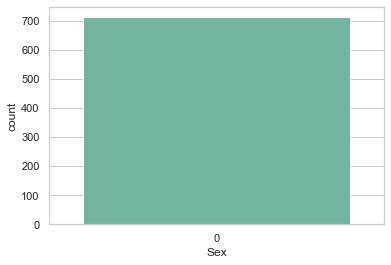

In [7]:
#Visualizing the distribution of variables
print(Dataset['Sex'].value_counts())
sns.countplot(x='Sex', data=Dataset, palette='Set2')
plt.show()

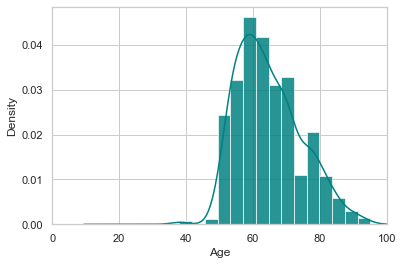

In [8]:
#Visualizing the distribution of variables
ax = Dataset["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(0,100)
plt.show()

In [9]:
Dataset.dtypes

ID                        int64
Sex                       int64
Age                       int64
Menopause_age            object
Tscore_Hip_total         object
CRP                      object
Cr                       object
ALP                      object
BUN                      object
P                        object
Ca                       object
PTH                      object
Vit_D3                   object
BMD_vertebra             object
Tscore_vertebra          object
Zscore_vertebra          object
BMD_Hip_total            object
Zscore_hip_total         object
BMD_Hip_Neck             object
Tscore_Hip_neck          object
Zscore_Hip_neck          object
BMI                      object
Pregnancy_Count          object
Histroy_Anticoagulant    object
Active_Smoking           object
History_Smoking          object
Calcium_Supplement       object
History_Diabetes_2       object
Refracture                int64
dtype: object

In [10]:
Dataset["Menopause_age"] = Dataset["Menopause_age"].astype("float")
Dataset["Tscore_Hip_total"] = Dataset["Tscore_Hip_total"].astype("float")
Dataset["CRP"] = Dataset["CRP"].astype("float")
Dataset["Cr"] = Dataset["Cr"].astype("float")
Dataset["ALP"] = Dataset["ALP"].astype("float")
Dataset["BUN"] = Dataset["BUN"].astype("float")
Dataset["P"] = Dataset["P"].astype("float")
Dataset["Ca"] = Dataset["Ca"].astype("float")
Dataset["PTH"] = Dataset["PTH"].astype("float")
Dataset["Vit_D3"] = Dataset["Vit_D3"].astype("float")
Dataset["BMD_vertebra"] = Dataset["BMD_vertebra"].astype("float")
Dataset["Tscore_vertebra"] = Dataset["Tscore_vertebra"].astype("float")
Dataset["Zscore_vertebra"] = Dataset["Zscore_vertebra"].astype("float")
Dataset["BMD_Hip_total"] = Dataset["BMD_Hip_total"].astype("float")
Dataset["Zscore_hip_total"] = Dataset["Zscore_hip_total"].astype("float")
Dataset["BMD_Hip_Neck"] = Dataset["BMD_Hip_Neck"].astype("float")
Dataset["Tscore_Hip_neck"] = Dataset["Tscore_Hip_neck"].astype("float")
Dataset["Zscore_Hip_neck"] = Dataset["Zscore_Hip_neck"].astype("float")
Dataset["BMI"] = Dataset["BMI"].astype("float")
Dataset["Pregnancy_Count"] = Dataset["Pregnancy_Count"].astype("float")

In [11]:
Dataset.dtypes

ID                         int64
Sex                        int64
Age                        int64
Menopause_age            float64
Tscore_Hip_total         float64
CRP                      float64
Cr                       float64
ALP                      float64
BUN                      float64
P                        float64
Ca                       float64
PTH                      float64
Vit_D3                   float64
BMD_vertebra             float64
Tscore_vertebra          float64
Zscore_vertebra          float64
BMD_Hip_total            float64
Zscore_hip_total         float64
BMD_Hip_Neck             float64
Tscore_Hip_neck          float64
Zscore_Hip_neck          float64
BMI                      float64
Pregnancy_Count          float64
Histroy_Anticoagulant     object
Active_Smoking            object
History_Smoking           object
Calcium_Supplement        object
History_Diabetes_2        object
Refracture                 int64
dtype: object

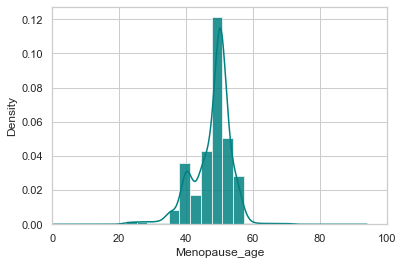

In [12]:
#Visualizing the distribution of variables
ax = Dataset["Menopause_age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Menopause_age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Menopause_age"].plot(kind='density', color='teal')
ax.set(xlabel='Menopause_age')
plt.xlim(0,100)
plt.show()

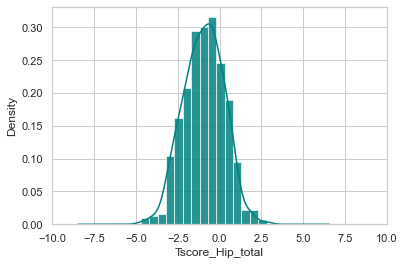

In [13]:
#Visualizing the distribution of variables
ax = Dataset["Tscore_Hip_total"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Tscore_Hip_total"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Tscore_Hip_total"].plot(kind='density', color='teal')
ax.set(xlabel='Tscore_Hip_total')
plt.xlim(-10,10)
plt.show()

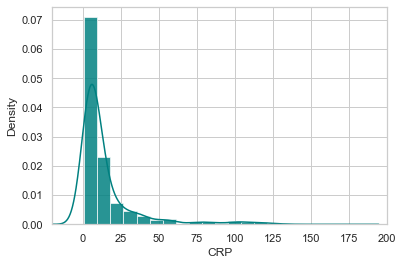

In [14]:
#Visualizing the distribution of variables
ax = Dataset["CRP"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["CRP"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["CRP"].plot(kind='density', color='teal')
ax.set(xlabel='CRP')
plt.xlim(-20,200)
plt.show()

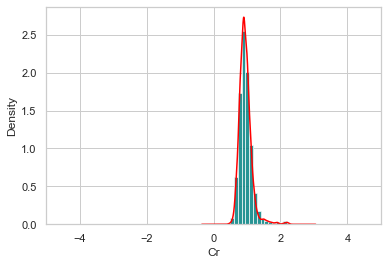

In [15]:
#Visualizing the distribution of variables
ax = Dataset["Cr"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Cr"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Cr"].plot(kind='density', color='red')
ax.set(xlabel='Cr')
plt.xlim(-5,5)
plt.show()

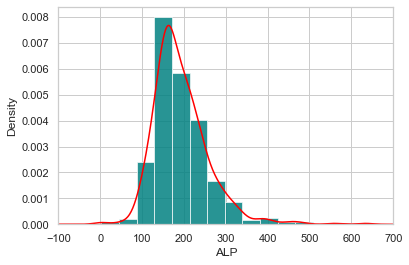

In [16]:
#Visualizing the distribution of variables
ax = Dataset["ALP"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["ALP"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["ALP"].plot(kind='density', color='red')
ax.set(xlabel='ALP')
plt.xlim(-100,700)
plt.show()

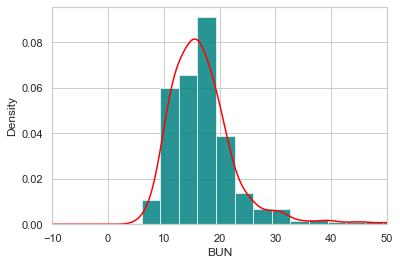

In [17]:
#Visualizing the distribution of variables
ax = Dataset["BUN"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["BUN"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["BUN"].plot(kind='density', color='red')
ax.set(xlabel='BUN')
plt.xlim(-10,50)
plt.show()

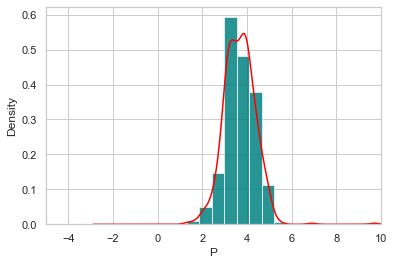

In [18]:
#Visualizing the distribution of variables
ax = Dataset["P"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["P"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["P"].plot(kind='density', color='red')
ax.set(xlabel='P')
plt.xlim(-5,10)
plt.show()

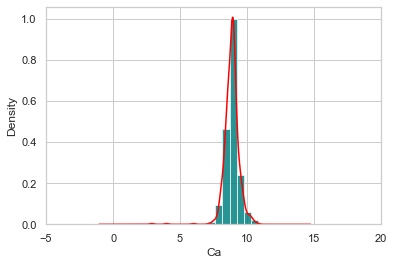

In [19]:
#Visualizing the distribution of variables
ax = Dataset["Ca"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Ca"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Ca"].plot(kind='density', color='red')
ax.set(xlabel='Ca')
plt.xlim(-5,20)
plt.show()

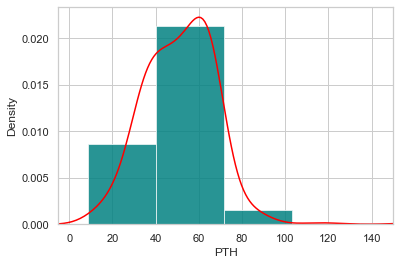

In [20]:
#Visualizing the distribution of variables
ax = Dataset["PTH"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["PTH"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["PTH"].plot(kind='density', color='red')
ax.set(xlabel='PTH')
plt.xlim(-5,150)
plt.show()

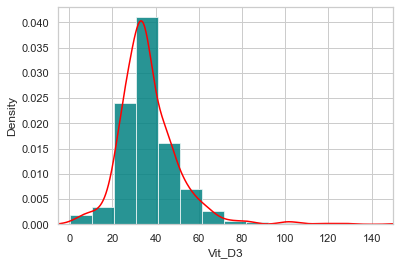

In [21]:
#Visualizing the distribution of variables
ax = Dataset["Vit_D3"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Vit_D3"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Vit_D3"].plot(kind='density', color='red')
ax.set(xlabel='Vit_D3')
plt.xlim(-5,150)
plt.show()

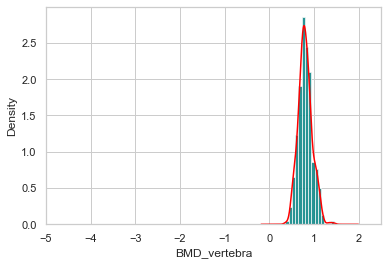

In [22]:
#Visualizing the distribution of variables
ax = Dataset["BMD_vertebra"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["BMD_vertebra"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["BMD_vertebra"].plot(kind='density', color='red')
ax.set(xlabel='BMD_vertebra')
plt.xlim(-5,2.5)
plt.show()

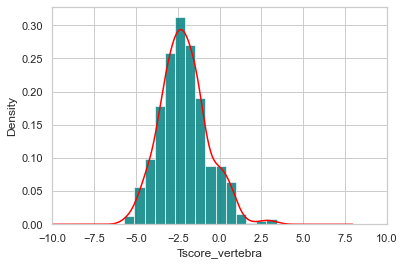

In [23]:
#Visualizing the distribution of variables
ax = Dataset["Tscore_vertebra"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Tscore_vertebra"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Tscore_vertebra"].plot(kind='density', color='red')
ax.set(xlabel='Tscore_vertebra')
plt.xlim(-10,10)
plt.show()

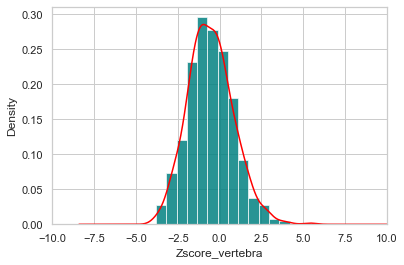

In [24]:
#Visualizing the distribution of variables
ax = Dataset["Zscore_vertebra"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Zscore_vertebra"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Zscore_vertebra"].plot(kind='density', color='red')
ax.set(xlabel='Zscore_vertebra')
plt.xlim(-10,10)
plt.show()

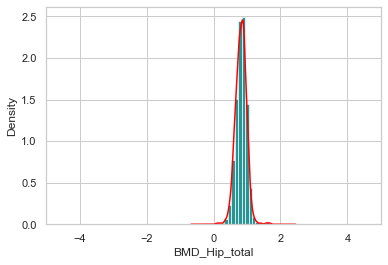

In [25]:
#Visualizing the distribution of variables
ax = Dataset["BMD_Hip_total"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["BMD_Hip_total"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["BMD_Hip_total"].plot(kind='density', color='red')
ax.set(xlabel='BMD_Hip_total')
plt.xlim(-5,5)
plt.show()

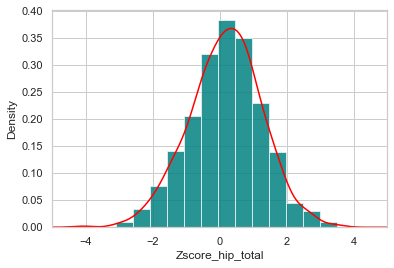

In [26]:
#Visualizing the distribution of variables
ax = Dataset["Zscore_hip_total"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Zscore_hip_total"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Zscore_hip_total"].plot(kind='density', color='red')
ax.set(xlabel='Zscore_hip_total')
plt.xlim(-5,5)
plt.show()

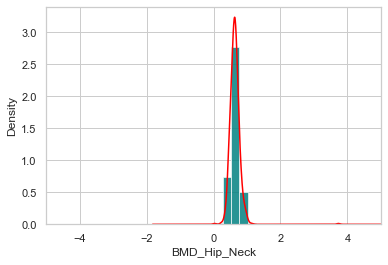

In [27]:
#Visualizing the distribution of variables
ax = Dataset["BMD_Hip_Neck"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["BMD_Hip_Neck"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["BMD_Hip_Neck"].plot(kind='density', color='red')
ax.set(xlabel='BMD_Hip_Neck')
plt.xlim(-5,5)
plt.show()

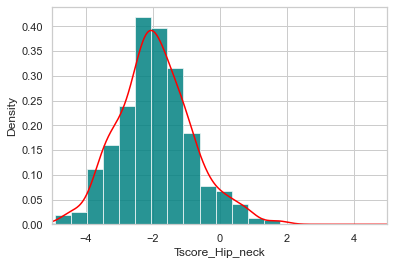

In [28]:
#Visualizing the distribution of variables
ax = Dataset["Tscore_Hip_neck"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Tscore_Hip_neck"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Tscore_Hip_neck"].plot(kind='density', color='red')
ax.set(xlabel='Tscore_Hip_neck')
plt.xlim(-5,5)
plt.show()

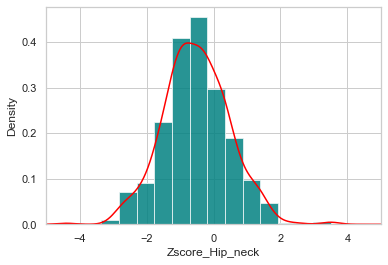

In [29]:
#Visualizing the distribution of variables
ax = Dataset["Zscore_Hip_neck"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Zscore_Hip_neck"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Zscore_Hip_neck"].plot(kind='density', color='red')
ax.set(xlabel='Zscore_Hip_neck')
plt.xlim(-5,5)
plt.show()

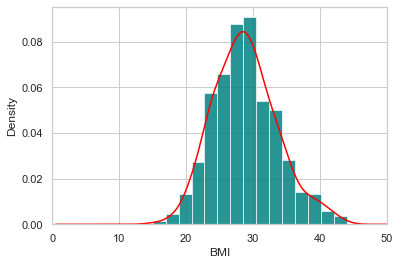

In [30]:
#Visualizing the distribution of variables
ax = Dataset["BMI"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["BMI"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["BMI"].plot(kind='density', color='red')
ax.set(xlabel='BMI')
plt.xlim(0,50)
plt.show()

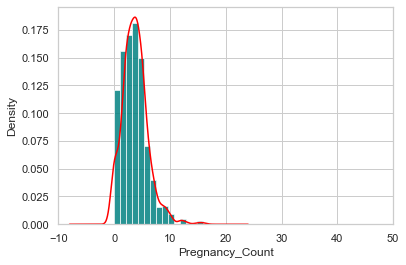

In [31]:
#Visualizing the distribution of variables
ax = Dataset["Pregnancy_Count"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Pregnancy_Count"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Pregnancy_Count"].plot(kind='density', color='red')
ax.set(xlabel='Pregnancy_Count')
plt.xlim(-10,50)
plt.show()

0    483
1    104
Name: Histroy_Anticoagulant, dtype: int64


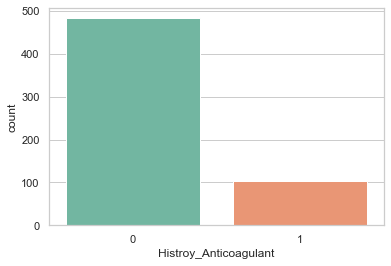

In [32]:
#Visualizing the distribution of variables
print(Dataset['Histroy_Anticoagulant'].value_counts())
sns.countplot(x='Histroy_Anticoagulant', data=Dataset, palette='Set2')
plt.show()

0    540
1     17
Name: Active_Smoking, dtype: int64


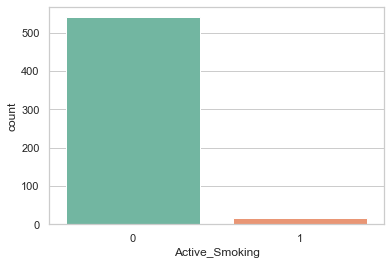

In [33]:
#Visualizing the distribution of variables
print(Dataset['Active_Smoking'].value_counts())
sns.countplot(x='Active_Smoking', data=Dataset, palette='Set2')
plt.show()

0    654
1     21
Name: History_Smoking, dtype: int64


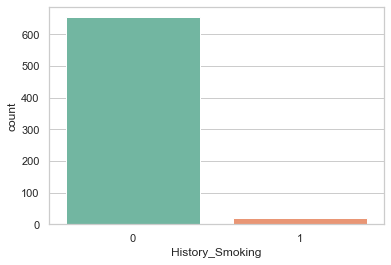

In [34]:
#Visualizing the distribution of variables
print(Dataset['History_Smoking'].value_counts())
sns.countplot(x='History_Smoking', data=Dataset, palette='Set2')
plt.show()

0    446
1    151
Name: History_Diabetes_2, dtype: int64


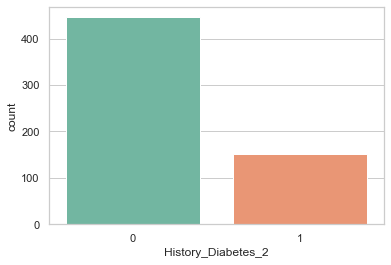

In [35]:
#Visualizing the distribution of variables
print(Dataset['History_Diabetes_2'].value_counts())
sns.countplot(x='History_Diabetes_2', data=Dataset, palette='Set2')
plt.show()

0    576
1     97
Name: Calcium_Supplement, dtype: int64


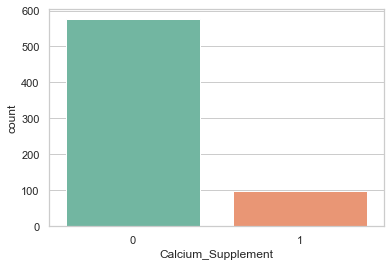

In [36]:
#Visualizing the distribution of variables
print(Dataset['Calcium_Supplement'].value_counts())
sns.countplot(x='Calcium_Supplement', data=Dataset, palette='Set2')
plt.show()

In [37]:
Dataset.columns

Index(['ID', 'Sex', 'Age', 'Menopause_age', 'Tscore_Hip_total', 'CRP', 'Cr',
       'ALP', 'BUN', 'P', 'Ca', 'PTH', 'Vit_D3', 'BMD_vertebra',
       'Tscore_vertebra', 'Zscore_vertebra', 'BMD_Hip_total',
       'Zscore_hip_total', 'BMD_Hip_Neck', 'Tscore_Hip_neck',
       'Zscore_Hip_neck', 'BMI', 'Pregnancy_Count', 'Histroy_Anticoagulant',
       'Active_Smoking', 'History_Smoking', 'Calcium_Supplement',
       'History_Diabetes_2', 'Refracture'],
      dtype='object')

In [38]:
Dataset['Menopause_age'].fillna(Dataset["Menopause_age"].median(skipna=True), inplace=True)
Dataset['Tscore_Hip_total'].fillna(Dataset["Tscore_Hip_total"].mean(skipna=True), inplace=True)
Dataset['CRP'].fillna(Dataset["CRP"].median(skipna=True), inplace=True)
Dataset['Cr'].fillna(Dataset["Cr"].mean(skipna=True), inplace=True)
Dataset['ALP'].fillna(Dataset["ALP"].mean(skipna=True), inplace=True)
Dataset['BUN'].fillna(Dataset["BUN"].mean(skipna=True), inplace=True)
Dataset['P'].fillna(Dataset["P"].mean(skipna=True), inplace=True)
Dataset['Ca'].fillna(Dataset["Ca"].mean(skipna=True), inplace=True)
Dataset['PTH'].fillna(Dataset["PTH"].median(skipna=True), inplace=True)
Dataset['Vit_D3'].fillna(Dataset["Vit_D3"].mean(skipna=True), inplace=True)
Dataset['BMD_vertebra'].fillna(Dataset["BMD_vertebra"].mean(skipna=True), inplace=True)
Dataset['Tscore_vertebra'].fillna(Dataset["Tscore_vertebra"].mean(skipna=True), inplace=True)
Dataset['Zscore_vertebra'].fillna(Dataset["Zscore_vertebra"].mean(skipna=True), inplace=True)
Dataset['BMD_Hip_total'].fillna(Dataset["BMD_Hip_total"].mean(skipna=True), inplace=True)
Dataset['Zscore_hip_total'].fillna(Dataset["Zscore_hip_total"].median(skipna=True), inplace=True)
Dataset['BMD_Hip_Neck'].fillna(Dataset["BMD_Hip_Neck"].mean(skipna=True), inplace=True)
Dataset['Tscore_Hip_neck'].fillna(Dataset["Tscore_Hip_neck"].mean(skipna=True), inplace=True)
Dataset['Zscore_Hip_neck'].fillna(Dataset["Zscore_Hip_neck"].mean(skipna=True), inplace=True)
Dataset['BMI'].fillna(Dataset["BMI"].mean(skipna=True), inplace=True)
Dataset['Pregnancy_Count'].fillna(Dataset["Pregnancy_Count"].median(skipna=True), inplace=True)
Dataset['Histroy_Anticoagulant'].fillna(0, inplace=True)
Dataset['Active_Smoking'].fillna(0, inplace=True)
Dataset['History_Smoking'].fillna(0, inplace=True)
Dataset['Calcium_Supplement'].fillna(0, inplace=True)
Dataset['History_Diabetes_2'].fillna(0, inplace=True)

In [39]:
Dataset.isnull().sum()

ID                       0
Sex                      0
Age                      0
Menopause_age            0
Tscore_Hip_total         0
CRP                      0
Cr                       0
ALP                      0
BUN                      0
P                        0
Ca                       0
PTH                      0
Vit_D3                   0
BMD_vertebra             0
Tscore_vertebra          0
Zscore_vertebra          0
BMD_Hip_total            0
Zscore_hip_total         0
BMD_Hip_Neck             0
Tscore_Hip_neck          0
Zscore_Hip_neck          0
BMI                      0
Pregnancy_Count          0
Histroy_Anticoagulant    0
Active_Smoking           0
History_Smoking          0
Calcium_Supplement       0
History_Diabetes_2       0
Refracture               0
dtype: int64

In [40]:
Dataset.drop("ID", axis=1, inplace= True)
Dataset.drop("Sex", axis=1, inplace= True)
Dataset.dtypes

Age                        int64
Menopause_age            float64
Tscore_Hip_total         float64
CRP                      float64
Cr                       float64
ALP                      float64
BUN                      float64
P                        float64
Ca                       float64
PTH                      float64
Vit_D3                   float64
BMD_vertebra             float64
Tscore_vertebra          float64
Zscore_vertebra          float64
BMD_Hip_total            float64
Zscore_hip_total         float64
BMD_Hip_Neck             float64
Tscore_Hip_neck          float64
Zscore_Hip_neck          float64
BMI                      float64
Pregnancy_Count          float64
Histroy_Anticoagulant     object
Active_Smoking            object
History_Smoking           object
Calcium_Supplement        object
History_Diabetes_2        object
Refracture                 int64
dtype: object

In [41]:
Dataset["Histroy_Anticoagulant"] = Dataset["Histroy_Anticoagulant"].astype("int")
Dataset["Active_Smoking"] = Dataset["Active_Smoking"].astype("int")
Dataset["History_Smoking"] = Dataset["History_Smoking"].astype("int")
Dataset["Calcium_Supplement"] = Dataset["Calcium_Supplement"].astype("int")
Dataset["History_Diabetes_2"] = Dataset["History_Diabetes_2"].astype("int")
Dataset["Refracture"] = Dataset["Refracture"].astype("int")

In [42]:
Dataset.to_csv("Dataset_Female_Final.csv")

In [43]:
X= Dataset.loc[:, Dataset.columns != 'Refracture']
Y = Dataset["Refracture"]

In [44]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

params = {
    "max_depth": [ 3, 4, 6, 8, 10, 15],
    'n_estimators': range(100,1000,200),
    'learning_rate': [0.1,0.01,0.001],
    "colsample_bytree" : [0.3, 0.5 , 0.8]
}

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X,Y.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [45]:
def display_results(results):
    print(f'Best parameters are: {results.best_params_}')
    print(f'Best Score is : {results.best_score_} ')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
display_results(cv)

Best parameters are: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 700}
Best Score is : 0.7907276995305165 


0.784 + or -0.017 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.764 + or -0.031 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.749 + or -0.044 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.743 + or -0.039 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.732 + or -0.04 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.772 + or -0.017 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.75 + or -0.04 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.741 + or -0.044 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_de

In [46]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=700,
                   max_depth = 3, learning_rate = 0.01, colsample_bytree = 0.5)
xgb.fit(X,Y)

scores_accuracy = cross_val_score(xgb, X, Y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(xgb, X, Y, cv=10, scoring='neg_log_loss')
scores_briar = cross_val_score(xgb, X, Y, cv=10, scoring='neg_brier_score')
scores_auc = cross_val_score(xgb, X, Y, cv=10, scoring='roc_auc')
scores_recall = cross_val_score(xgb, X, Y, cv=10, scoring='recall')
scores_precision = cross_val_score(xgb, X, Y, cv=10, scoring='precision')
scores_f1 = cross_val_score(xgb, X, Y, cv=10, scoring='f1')
print('K-fold cross-validation results:')
print("XGBoost average accuracy is %2.3f" % scores_accuracy.mean())
print("XGBoost average log_loss is %2.3f" % -scores_log_loss.mean())
print("XGBoost average brier score is %2.3f" % -scores_briar.mean())
print("XGBoost average auc is %2.3f" % scores_auc.mean())
print("XGBoost average recall is %2.3f" % scores_recall.mean())
print("XGBoost average precision is %2.3f" % scores_precision.mean())
print("XGBoost average f1 is %2.3f" % scores_f1.mean())

C:\Users\alish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

K-fold cross-validation results:
XGBoost average accuracy is 0.791
XGBoost average log_loss is 0.541
XGBoost average brier score is 0.174
XGBoost average auc is 0.502
XGBoost average recall is 0.020
XGBoost average precision is 0.250
XGBoost average f1 is 0.037


In [47]:
sm = SMOTE(random_state=5)
X_balanced, Y_balanced = sm.fit_resample(X, Y)

In [48]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

params = {
    "max_depth": [ 3, 4, 6, 8, 10, 15],
    'n_estimators': range(100,1000,200),
    'learning_rate': [0.1,0.01,0.001],
    "colsample_bytree" : [0.3, 0.5 , 0.8]
}

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X_balanced,Y_balanced.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [49]:
def display_results(results):
    print(f'Best parameters are: {results.best_params_}')
    print(f'Best Score is : {results.best_score_} ')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
display_results(cv)

Best parameters are: {'colsample_bytree': 0.3, 'learning_rate': 0.001, 'max_depth': 15, 'n_estimators': 300}
Best Score is : 0.8626975347661189 


0.72 + or -0.183 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.736 + or -0.174 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.729 + or -0.19 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.737 + or -0.169 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.741 + or -0.167 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.759 + or -0.181 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.741 + or -0.178 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.75 + or -0.173 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_

In [51]:
xgb_balanced = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=300,
                   max_depth = 15, learning_rate = 0.001, colsample_bytree = 0.3)
xgb_balanced.fit(X_balanced,Y_balanced)

scores_accuracy = cross_val_score(xgb_balanced, X_balanced, Y_balanced, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(xgb_balanced, X_balanced, Y_balanced, cv=10, scoring='neg_log_loss')
scores_briar = cross_val_score(xgb_balanced, X_balanced, Y_balanced, cv=10, scoring='neg_brier_score')
scores_auc = cross_val_score(xgb_balanced, X_balanced, Y_balanced, cv=10, scoring='roc_auc')
scores_recall = cross_val_score(xgb_balanced, X_balanced, Y_balanced, cv=10, scoring='recall')
scores_precision = cross_val_score(xgb_balanced, X_balanced, Y_balanced, cv=10, scoring='precision')
scores_f1 = cross_val_score(xgb_balanced, X_balanced, Y_balanced, cv=10, scoring='f1')
print('K-fold cross-validation results:')
print("XGBoost average accuracy is %2.3f" % scores_accuracy.mean())
print("XGBoost average log_loss is %2.3f" % -scores_log_loss.mean())
print("XGBoost average brier score is %2.3f" % -scores_briar.mean())
print("XGBoost average auc is %2.3f" % scores_auc.mean())
print("XGBoost average recall is %2.3f" % scores_recall.mean())
print("XGBoost average precision is %2.3f" % scores_precision.mean())
print("XGBoost average f1 is %2.3f" % scores_f1.mean())

K-fold cross-validation results:
XGBoost average accuracy is 0.863
XGBoost average log_loss is 0.626
XGBoost average brier score is 0.217
XGBoost average auc is 0.883
XGBoost average recall is 0.779
XGBoost average precision is 0.918
XGBoost average f1 is 0.798
